In [1]:
# ! pip install -q -U google-genai 

In [ ]:
from google import genai
from PIL import Image
import os
import numpy as np
from dotenv import load_dotenv
load_dotenv()

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))

def get_llm_response(query, image=None):
	if image is None:
		response = client.models.generate_content(model="gemini-2.0-flash", contents=query)
	else:
		response = client.models.generate_content(model="gemini-2.0-flash", contents=[image, query])
	return response.text

In [3]:
#get_gemini_response("Write a story about a bird")

In [4]:
image = Image.open("testimage.jpg")
#get_gemini_response("Tell me about this image", image)

In [5]:
import my_clipmlp
clipmlp_category, clip_feat = my_clipmlp.classify_image_clipmlp(image)

Top-10 closest images:
 1. 7965307.5291.npy — cosine sim: 0.9142


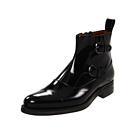

 2. 8028981.3.npy — cosine sim: 0.9133


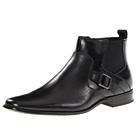

 3. 7997812.3.npy — cosine sim: 0.9133


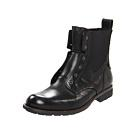

 4. 8071391.89.npy — cosine sim: 0.9130


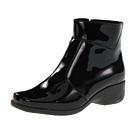

 5. 8045660.3.npy — cosine sim: 0.9118


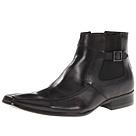

 6. 7976548.3.npy — cosine sim: 0.9103


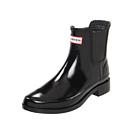

 7. 8000978.364150.npy — cosine sim: 0.9072


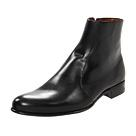

 8. 8045829.38751.npy — cosine sim: 0.9064


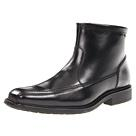

 9. 7876564.5291.npy — cosine sim: 0.9062


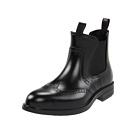

10. 8046641.3.npy — cosine sim: 0.9052


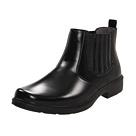

In [6]:
# 1) load the bank
top10 = my_clipmlp.clip_find_top_k_similar_in_category(f"shoe_features\\{clipmlp_category}", clip_feat)

# 3) print them out
print("Top-10 closest images:")
for rank, (p, sim) in enumerate(top10, start=1):
	print(f"{rank:2d}. {os.path.basename(p)} — cosine sim: {sim:.4f}")
	display(Image.open(f"shoes\\{clipmlp_category}\\{os.path.basename(p)[:-4]}.jpg"))